In [1]:
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dropout, BatchNormalization, Dense, Flatten, LayerNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.applications as appl
from sklearn.model_selection import train_test_split
import os
import cv2
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from tqdm import tqdm
from tensorflow.keras.utils import Sequence
from keras import callbacks  
from keras.models import load_model
from keras.utils import np_utils

In [2]:
load_path='E:/VA/onehandtwohand/128/106words_DSLR_FH/'

In [3]:
CATEGORIES=np.load(load_path+'cat_106.npy', allow_pickle=True)

In [4]:
IMG_SIZE=128

In [5]:
cat_len=len(CATEGORIES)
print(cat_len)

106


# Save combined data npy

In [7]:
# model

# model_name1 = 'InceptionResNetV2'
# model_name1 = '4layer'
model_name1 = 'depthwise15_106words_dslr128'
#model_name2 = 'VGG16'
# model_name1 = 'DenseNet121'
# model_name1 = 'InceptionV3'

Loading

In [6]:
X=np.load(load_path+'X_dslr.npy', allow_pickle=True)
Y=np.load(load_path+'Y_dslr.npy', allow_pickle=True)

In [7]:
X.shape

(43469, 128, 128, 3)

In [8]:
print(X[1])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


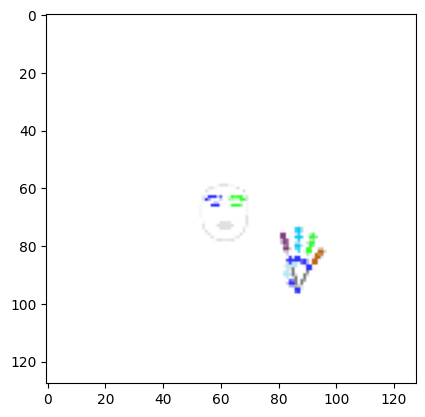

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X[1])

In [9]:
X = X.astype('float32')
X /= 255


In [10]:
print('Splitting') 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = cat_len)
X_train, X_new, y_train, y_new = train_test_split(X_train, y_train, test_size = 0.2, random_state = cat_len)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_new = np.array(X_new)
y_new = np.array(y_new)

print("pass")

Splitting
pass


In [11]:
del X,Y

In [12]:
print('Image Data Augmentation')
from keras.preprocessing.image import ImageDataGenerator
val_generator = ImageDataGenerator(rotation_range=0, zoom_range=0.2, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.2)
#                                     , horizontal_flip=True, brightness_range=[0.6,1.3])
val_generator.fit(X_train)
val_generator.fit(X_new)
val_generator.fit(X_test)

print("done")

Image Data Augmentation
done


In [13]:
import tensorflow as tf

# Define the model architecture
model = tf.keras.Sequential([
    # First layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Second layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Third layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Fourth layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Fifth layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Sixth layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
#     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Seventh layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Eighth layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Nineth layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # 10th layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # 11th layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # 12th layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
#     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
   
    # Flatten the output from convolutional layers
    tf.keras.layers.Flatten(),
    
    # Add a dense layer to learn the final classification
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    # Output layer with softmax activation function for multi-class classification
    tf.keras.layers.Dense(106, activation='softmax')
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 depthwise_conv2d (Depthwise  (None, 128, 128, 3)      30        
 Conv2D)                                                         
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 3)      12        
 ormalization)                                                   
                                                                 
 depthwise_conv2d_1 (Depthwi  (None, 128, 128, 3)      30        
 seConv2D)                                                       
                                                                 
 depthwise_conv2d_2 (Depthwi  (None, 128, 128, 3)      30        
 seConv2D)                                                       
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 3)      1

In [14]:
print('Training model 1')
opt = Adam(learning_rate=0.0001)
earlystopping = callbacks.EarlyStopping(monitor="val_loss", patience = 5, restore_best_weights = True)
# Compile the model with categorical crossentropy loss function and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# model1.summary()

history_const = model.fit(X_train, y_train,batch_size=100, epochs = 1000, validation_data=(X_test,y_test),
                   callbacks= [earlystopping])


Training model 1
Epoch 1/1000
244/244 [==============================] - 19s 67ms/step - loss: 4.2798 - accuracy: 0.0687 - val_loss: 4.5824 - val_accuracy: 0.0162
Epoch 2/1000
244/244 [==============================] - 15s 63ms/step - loss: 3.2738 - accuracy: 0.1929 - val_loss: 4.0600 - val_accuracy: 0.1097
Epoch 3/1000
244/244 [==============================] - 15s 63ms/step - loss: 2.8009 - accuracy: 0.2710 - val_loss: 2.5566 - val_accuracy: 0.3606
Epoch 4/1000
244/244 [==============================] - 15s 63ms/step - loss: 2.5258 - accuracy: 0.3212 - val_loss: 2.2140 - val_accuracy: 0.4053
Epoch 5/1000
244/244 [==============================] - 15s 63ms/step - loss: 2.3198 - accuracy: 0.3626 - val_loss: 2.0034 - val_accuracy: 0.4556
Epoch 6/1000
244/244 [==============================] - 15s 63ms/step - loss: 2.1278 - accuracy: 0.4083 - val_loss: 1.8391 - val_accuracy: 0.4967
Epoch 7/1000
244/244 [==============================] - 15s 63ms/step - loss: 1.9508 - accuracy: 0.4470 - v

Epoch 57/1000
244/244 [==============================] - 15s 63ms/step - loss: 0.1428 - accuracy: 0.9499 - val_loss: 0.1089 - val_accuracy: 0.9645
Epoch 58/1000
244/244 [==============================] - 15s 63ms/step - loss: 0.1365 - accuracy: 0.9542 - val_loss: 0.1097 - val_accuracy: 0.9676
Epoch 59/1000
244/244 [==============================] - 15s 63ms/step - loss: 0.1288 - accuracy: 0.9565 - val_loss: 0.1091 - val_accuracy: 0.9668
Epoch 60/1000
244/244 [==============================] - 15s 63ms/step - loss: 0.1301 - accuracy: 0.9559 - val_loss: 0.1082 - val_accuracy: 0.9663
Epoch 61/1000
244/244 [==============================] - 15s 63ms/step - loss: 0.1259 - accuracy: 0.9568 - val_loss: 0.1075 - val_accuracy: 0.9669
Epoch 62/1000
244/244 [==============================] - 15s 63ms/step - loss: 0.1189 - accuracy: 0.9585 - val_loss: 0.1007 - val_accuracy: 0.9693
Epoch 63/1000
244/244 [==============================] - 15s 63ms/step - loss: 0.1190 - accuracy: 0.9596 - val_loss: 0

In [16]:
print('Saving')
np.save(load_path+model_name1+'_history.npy',history_const.history)
model.save(load_path+model_name1+'_model.h5') 
print("saved")

Saving
saved


In [7]:
# #load saved history
history_const=np.load(load_path+model_name1+'_history.npy',allow_pickle='TRUE').item()

# #load saved model
model1=load_model(load_path+model_name1+'_model.h5')

print("loaded")

loaded


Plots


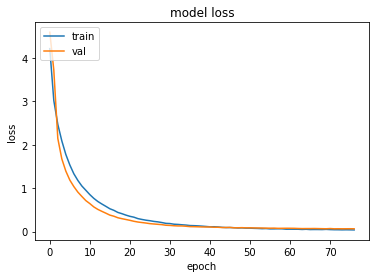

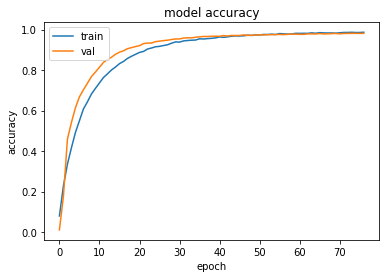

In [14]:
print('Plots')
plt.plot(history_const.history['loss'])
plt.plot(history_const.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.savefig('F:/VA/onehandtwohand/26words_DSLR_results/'+model_name1+'_loss.png')
plt.savefig(load_path+model_name1+'_loss.png')
plt.show()
plt.plot(history_const.history['accuracy'])
plt.plot(history_const.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig(load_path+model_name1+'_accuracy.png')
plt.show()

In [ ]:
print('Confusion matrix')
Y_pred = model1.predict(X_new)
y_pred = np.argmax(Y_pred, axis=1)
y_test1 = np.argmax(y_new, axis=1)

cm=metrics.confusion_matrix(y_test1, y_pred)

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
a4_dims = (200, 100)
fig,ax= plt.subplots(figsize=a4_dims)
sns.heatmap(cm, annot=True, fmt=".2f", ax=ax,  linewidth=.5);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.set_xticklabels(CATEGORIES)
ax.set_yticklabels(CATEGORIES)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.setp(ax.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.savefig(load_path+model_name1+'_cm.png',bbox_inches='tight')
plt.show()


In [ ]:
#PLot fractional incorrect misclassifications

incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)

fig, ax = plt.subplots(figsize=(12,8))
plt.bar(np.arange(cat_len), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(cat_len), CATEGORIES)
plt.savefig(load_path+model_name1+'_incorrect_percentage.png',bbox_inches='tight')
plt.show()

In [ ]:
#CHECK RANDOM IMAGES FROM TESTED DATA WHETHER RIGHT OR WRONG

i = random.randint(1,cat_len)
plt.imshow(X_new[i,:,:,2]) 
print("Predicted Label: ", CATEGORIES[int(y_pred[i])])
print("True Label: ", CATEGORIES[int(y_test1[i])])

# Colourful mediapipe testing with VA_create_3.0

In [8]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results
    
def draw_landmarks(image, results):   
    #face
    mp_drawing.draw_landmarks(
        image,
        results.face_landmarks,
        mp_holistic.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_contours_style())
#     #pose
#     mp_drawing.draw_landmarks(
#         image,
#         results.pose_landmarks,
#         mp_holistic.POSE_CONNECTIONS,
#         landmark_drawing_spec=mp_drawing_styles
#         .get_default_pose_landmarks_style())
    
    #left hand
    mp_drawing.draw_landmarks(
        image,
        results.left_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
#         landmark_drawing_spec=None,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
    # right hand
    mp_drawing.draw_landmarks(
        image,
        results.right_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
#         landmark_drawing_spec=None,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

In [9]:
## For veryyyyyyyy beautiful webcam input:

cap = cv2.VideoCapture(0)
org = (20, 20)  
org1 = (310, 20) 
fontScale = 0.65  
font = cv2.FONT_HERSHEY_SIMPLEX
# Blue color in BGR
color = (130, 0, 0)  
# Line thickness of 2 px
thickness = 1 
thickness1 = -1
start_point = (0,0)
end_point = (480,30)
color1 = (255, 255, 255)  
cls='R'
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
      while cap.isOpened():
        #image from feeder
        r, img_array = cap.read()
        img_array = cv2.flip(img_array, 1)
        #webcam
        img_array = img_array[:, 80:560, :]
        #dslr
#         img_array = cv2.resize(img_array[:, 224:800, :],(480,480))
        
        image, results = mediapipe_detection(img_array, holistic)
        draw_landmarks(image, results)
        if not (results.left_hand_landmarks or results.right_hand_landmarks):
            continue

        # white background
        img = np.zeros([480,480,3],dtype=np.uint8)
        img.fill(255) 
        draw_landmarks(img, results)

        # for prediction
        IMG_SIZE=128
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X = np.array(img).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
        X = X.astype('float32')
        X /= 255
        X = np.array(X)
        Y = model1.predict(X,verbose=0)

        if np.max(Y)>0.2:
            # for display
            image = cv2.rectangle(image, start_point, end_point, color1, thickness1)
            image = cv2.rectangle(image, (0,30), (480,30), color, 2)
            image = cv2.putText(image,"Prediction: "+ CATEGORIES[np.argmax(Y)], org, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
            image = cv2.putText(image,"Accuracy: "+ "%.2f" % np.max(Y), org1, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
#             if CATEGORIES[np.argmax(Y)]==cls:
            if np.max(Y)>0.8:
                cv2.imwrite(load_path+'/99.79_misc_rajesh/mp_'+
                            CATEGORIES[np.argmax(Y)]+'_'+str(np.max(Y))+'.jpg',image)
                cv2.imwrite(load_path+'/99.79_misc_rajesh/ori_'+
                            CATEGORIES[np.argmax(Y)]+'_'+str(np.max(Y))+'.jpg',img_array)


        cv2.imshow('Realtime testing', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
                break
# close the camera
cap.release()

# close all the opened windows
cv2.destroyAllWindows()